## 2주차 l 미션 _ 이혜승

In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

📌 Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [26]:
df.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [3]:
# "약국"에 해당하는 데이터 필터링
pharmacies = df[df['상권업종소분류명'] == '약국']

# 시도별로 그룹화하여 빈도수 계산
pharmacy_counts = pharmacies['시도명'].value_counts()

# 결과 출력
print(pharmacy_counts)

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64


📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
다음의 결과가 나오도록 구합니다.

In [7]:
# "동물병원"에 해당하는 데이터만 필터링
animal_hospitals = df[df['상권업종소분류명'] == '동물병원']

In [8]:
# 시도별 또는 구별로 그룹화하여 빈도수 계산
animal_hospital_counts = animal_hospitals['시도명'].value_counts()

In [14]:
# 결과 출력
print(animal_hospital_counts)

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams["font.family"] = 'NanumGothic'

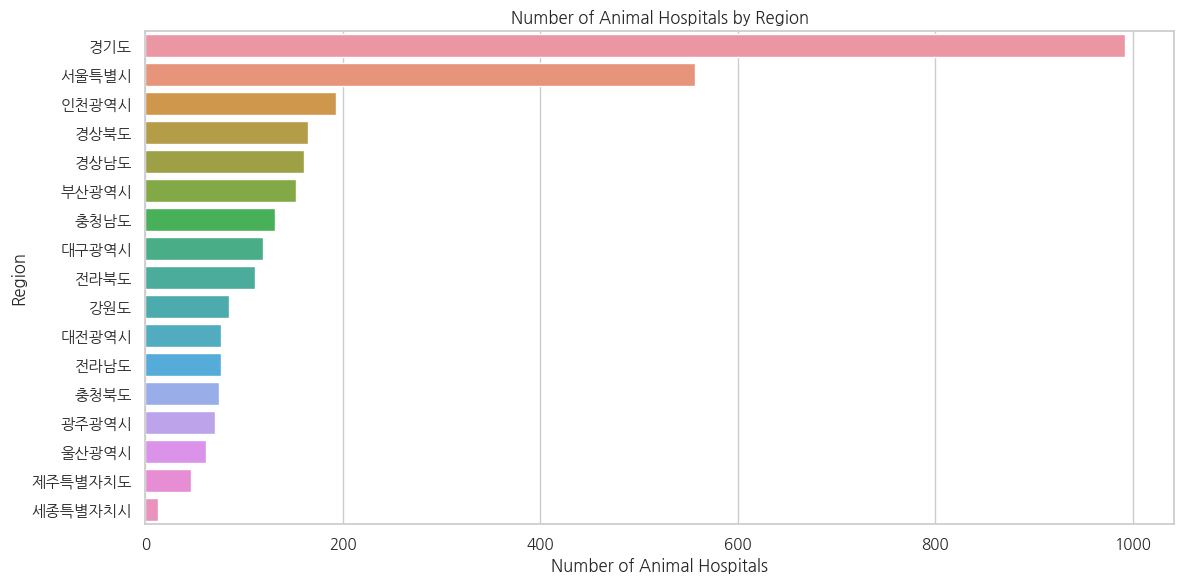

In [16]:
import seaborn as sns

# 데이터 필터링 및 빈도수 계산 코드 (이전 단계 참조)


# 데이터 프레임 생성
df_counts = animal_hospital_counts.reset_index()
df_counts.columns = ['Region', 'Count']

# 바 차트 생성
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Region', data=df_counts)

# 차트 제목 및 라벨 설정
plt.title('Number of Animal Hospitals by Region')
plt.xlabel('Number of Animal Hospitals')
plt.ylabel('Region')

# 보기 좋게 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
비율이 높은 순서대로 정렬되게 구해주세요!
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [21]:
import csv

data = open("C:/Users/hyeseung/Naver_DataScience_Study/의료기관.csv")
df = csv.reader(data)
print(data)

<_io.TextIOWrapper name='C:/Users/hyeseung/Naver_DataScience_Study/의료기관.csv' mode='r' encoding='cp949'>


In [29]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [32]:
import pandas as pd

# 서울에 있는 병원만 필터링
seoul_hospitals = df[(df['도로명'].str.contains("서울"))]

# "피부"나 "성형"이 포함된 병원 필터링
skin_and_plastic_surgery = seoul_hospitals[seoul_hospitals['상권업종소분류명'].str.contains("피부|성형")]
skin_and_plastic_surgery

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223
31,20872995,고운나라성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,3,NaN,127.126507,37.537333
44,20912401,아미가성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010100109020001015305,원등빌딩,서울특별시 서초구 방배로20길 4,137060.0,6664.0,NaN,3,NaN,126.995334,37.485498
94,21859520,새롬성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1156010500104250037035858,NaN,서울특별시 영등포구 경인로 835,150034.0,7305.0,NaN,NaN,NaN,126.905647,37.516310
164,22838864,김종서성형,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105990004010396,압구정빌딩,서울특별시 강남구 논현로 842,135893.0,6025.0,NaN,2,NaN,127.028712,37.524027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91183,16311408,더새로이보셀르성형외과의원,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010800113080026000001,강남역리가스퀘어,서울특별시 서초구 서초대로73길 42,137856.0,6612.0,307,3,311,127.024427,37.501222
91241,16109061,인터내셔널이미지업성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1165010600100190007019199,이미지업빌딩,서울특별시 서초구 나루터로 76,137903.0,6526.0,NaN,3,2,127.018077,37.515451
91243,16131207,UBA성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105010000000001,신사미타워,서울특별시 강남구 강남대로 616,135887.0,6035.0,NaN,5,502,127.019778,37.516843
91285,16131940,대한피부과학연구소,NaN,S,의료,S01,병원,S01B16,피부과,Q86201,...,1168010100108320007025977,황화빌딩,서울특별시 강남구 강남대로 320,135936.0,6252.0,NaN,NaN,1108,127.031028,37.491842


In [33]:

# 지역별 피부과 및 성형외과 수 계산
specific_hospital_counts = skin_and_plastic_surgery['시군구명'].value_counts()

# 지역별 전체 병원 수 계산
total_hospital_counts = seoul_hospitals['시군구명'].value_counts()

# 비율 계산
ratio = (specific_hospital_counts / total_hospital_counts).sort_values(ascending=False)

# 소수 둘째 자리까지 표시하도록 반올림
final_ratio = ratio.round(2)

# 결과 출력
print(final_ratio)


강남구     0.19
서초구     0.13
마포구     0.06
중구      0.05
서대문구    0.05
영등포구    0.05
강동구     0.05
강서구     0.05
송파구     0.05
양천구     0.05
중랑구     0.04
은평구     0.04
광진구     0.04
성북구     0.04
구로구     0.04
성동구     0.04
노원구     0.04
강북구     0.03
금천구     0.03
관악구     0.03
동작구     0.03
용산구     0.03
동대문구    0.02
종로구     0.02
도봉구     0.01
파주시      NaN
Name: 시군구명, dtype: float64


📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [35]:
import folium


# '노인/치매병원' 데이터 필터링
elderly_hospitals = df[df['상권업종소분류명'].str.contains('노인|치매')]

# 누락된 위치 데이터 제거 (필요한 경우)
elderly_hospitals = elderly_hospitals.dropna(subset=['위도', '경도'])

# 지도의 중심을 계산하기 위한 평균 위도, 경도 계산
average_lat = elderly_hospitals['위도'].mean()
average_lon = elderly_hospitals['경도'].mean()

# 지도 생성
m = folium.Map(location=[average_lat, average_lon], zoom_start=7)

# 각 병원 위치에 마커 추가
for idx, row in elderly_hospitals.iterrows():
    lat, lon = row['위도'], row['경도']
    name = row['상호명']
    folium.Marker([lat, lon], popup=name).add_to(m)

# 지도를 HTML 파일로 저장
m.save('elderly_hospitals_map.html')

# 지도 표시 (Jupyter 노트북에서 실행하는 경우)
m
